In [46]:
import pandas as pd
import re

songs = pd.read_csv("./data/songs.csv")
sent = pd.read_csv("./data/dictionary.csv")

In [47]:
songs.head()

,Unnamed: 0,name,artists,year,text
0,3,Mic Check,Rage Against The Machine,1999,Oh Wait a minute now \nHa ha ha \nCome on \...
1,6,Born As Ghosts,Rage Against The Machine,1999,The hills find peace \nLocked armed guard pos...
2,12,Bombtrack,Rage Against The Machine,1992,"Ughh! \nHey yo, it's just another bombtrack u..."
3,17,Know Your Enemy,Rage Against The Machine,1992,"Huh! \nYeah, we're comin' back then with anot..."
4,20,Township Rebellion,Rage Against The Machine,1992,"Rebel, rebel and yell \n'Cause our people sti..."


In [48]:
sent.head()

,term,sentiment
0,a,0
1,a.d.,0
2,a.k.a.,0
3,a.m.,0
4,aardvark,0


In [49]:
print(songs.text[0])

Oh Wait a minute now  
Ha ha ha  
Come on  
Wait a Minute Now  
Check  
  
To tha young r to tha e tha b to tha e tha l  
Never give up just live up  
Fed upon America  
We be spittin' it up  
Rippin' it up  
For an even amount in each cup  
To my brothers burning bare feet on black top  
Whose curled 'neath tha shadows  
From tha gaze of tha cops  
Whose huntin' for 9 to 5's through factory locks  
Is now hunted on this modern day auction block  
  
Mic Check, ha ha ha  
I be the anti-myth rhythm rock shocker  
Mic Check, ha ha ha ha  
I be the anti-myth rhythm rock shocker, what?  
Mic Check, ha ha ha  
I be the anti-myth rhythm rock shocker  
Mic Check, ha ha ha ha  
I be the anti-myth rhythm rock shocker, what?  
  
Check check check check the check, oh  
Packin  
  
Flexin' and mashin'  
With complex text  
Fast and in a fashion  
That snap back necks  
Quicker than a fed cash tha company checks  
Come with tha fire only Marley could catch  
This be tha flame in tha cellar beware 

# Task 2
We need to do some preprocessing but for sentiment analysis.
- removing `\n`
- make everything lower case

# Task 3 
We will just join the very rudimentary split word vector with the sentiment data frame and sum up all the sentiment values

In [50]:
# first off set index of sentiment dict to term
sent.set_index("term", inplace=True)

In [51]:
sent.head()

,sentiment
term,
a,0
a.d.,0
a.k.a.,0
a.m.,0
aardvark,0


In [61]:
# writing down the first draft of the sentiment analysis
# on the fly preprocessing 
song_text = re.sub(r"\n|[^\w ]", "", songs.text[0]).lower()
# do sentiment by join
text_df = pd.DataFrame({"term": song_text.split(" ")})
text_df.merge(sent, on = "term", how = "left").sentiment.sum()

np.float64(-43.0)

In [66]:
# after testing implement this in a function
def sentiment_analysis(text):
  song_text = re.sub(r"\n|[^\w ]", "", text).lower()
  # do sentiment by join
  text_df = pd.DataFrame({"term": song_text.split(" ")})
  sentiment = text_df.merge(sent, on = "term", how = "left").sentiment.sum()
  return sentiment

In [68]:
# apply this to the songs
songs["sentiment"] = songs.apply(lambda row: sentiment_analysis(row["text"]), axis= 1)

In [69]:
songs.head()

,Unnamed: 0,name,artists,year,text,sentiment
0,3,Mic Check,Rage Against The Machine,1999,Oh Wait a minute now \nHa ha ha \nCome on \...,-43.0
1,6,Born As Ghosts,Rage Against The Machine,1999,The hills find peace \nLocked armed guard pos...,-18.0
2,12,Bombtrack,Rage Against The Machine,1992,"Ughh! \nHey yo, it's just another bombtrack u...",-113.0
3,17,Know Your Enemy,Rage Against The Machine,1992,"Huh! \nYeah, we're comin' back then with anot...",-51.0
4,20,Township Rebellion,Rage Against The Machine,1992,"Rebel, rebel and yell \n'Cause our people sti...",-80.0


# Task 4
We just group by and plot it using the normal `.plot` function

<Axes: xlabel='year'>

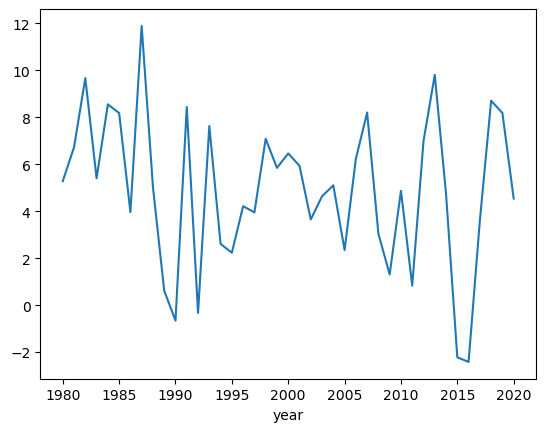

In [81]:
sent_df = songs.groupby("year").sentiment.mean()
sent_df.plot()

<Axes: xlabel='year'>

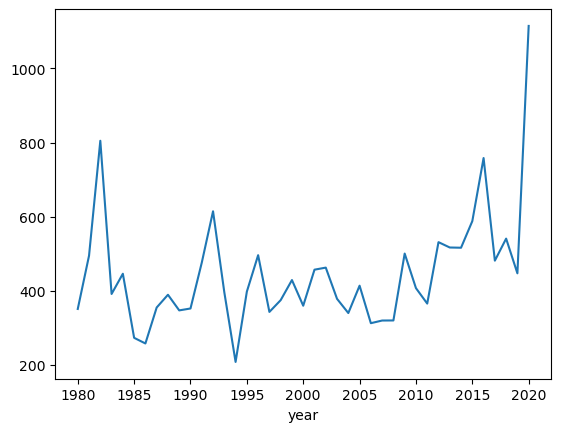

In [82]:
sent_var_df = songs.groupby("year").sentiment.var()
sent_var_df.plot()